In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Group 2.csv')

# Display the first few rows of the dataset
data


,Unnamed: 0,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,0,K3713,Male,Hampshire,0,Unknown,0,12.0,NaN,1,6,Churn=No
1,1,D9048,Male,Greater Manchester,1,1,0,21.0,NaN,4,6,Churn=No
2,2,K8227,Female,West Yorkshire,0,Unknown,0,0.0,NaN,1,4,Churn=Yes
3,3,H3533,Male,Greater London,1,1,1,11.0,NaN,2,4,Churn=No
4,4,J4501,Male,Greater London,0,0,0,7.0,NaN,4,2,Churn=Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7345,7345,H7244,Female,Greater London,0,0,0,1.0,NaN,1,1,Churn=Yes
7346,7346,F1052,Male,Hampshire,0,0,0,2.0,NaN,1,5,Churn=Yes
7347,7347,I5775,Male,Greater London,1,1,0,16.0,NaN,4,2,Churn=No
7348,7348,E9984,Female,Greater London,0,1,0,17.0,NaN,1,4,Churn=Yes


In [2]:
# Drop the unnecessary column
data.drop(columns=['Unnamed: 0'], inplace=True)

# Check for missing values
missing_values = data.isnull().sum()

# Basic statistics for numeric columns
numeric_stats = data.describe()

# Distribution of the target variable
target_distribution = data['Class'].value_counts()

missing_values, numeric_stats, target_distribution


(customer_id        0
 gender             0
 location           0
 partner            0
 dependents         0
 senior             0
 Tenure             0
 monthly_cost    7283
 package            0
 survey             0
 Class             49
 dtype: int64,
            partner       senior       Tenure      package
 count  7350.000000  7350.000000  7350.000000  7350.000000
 mean      0.549252     0.172925     8.665947     2.425850
 std       0.497602     0.378208     6.404877     1.151303
 min       0.000000     0.000000    -4.690416     1.000000
 25%       0.000000     0.000000     3.000000     1.000000
 50%       1.000000     0.000000     8.000000     2.000000
 75%       1.000000     0.000000    14.000000     4.000000
 max       1.000000     1.000000    30.000000     4.000000,
 Churn=No     5203
 Churn=Yes    2081
 Y$e$s$$        17
 Name: Class, dtype: int64)

Handle the negative values in the Tenure column.
Investigate and address the anomalies in the Class column.
Decide how to handle missing values in the monthly_cost column.
Investigate the dependents column to handle the "Unknown" entries.

In [3]:
data_summary = data.describe(include='all')
data_info = data.info()

data_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7350 entries, 0 to 7349
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   7350 non-null   object 
 1   gender        7350 non-null   object 
 2   location      7350 non-null   object 
 3   partner       7350 non-null   int64  
 4   dependents    7350 non-null   object 
 5   senior        7350 non-null   int64  
 6   Tenure        7350 non-null   float64
 7   monthly_cost  67 non-null     object 
 8   package       7350 non-null   int64  
 9   survey        7350 non-null   object 
 10  Class         7301 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 631.8+ KB


,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
count,7350,7350,7350,7350.000000,7350,7350.000000,7350.000000,67,7350.000000,7350,7301
unique,6752,2,17,NaN,3,NaN,NaN,66,NaN,12,3
top,K4807,Male,Greater London,NaN,1,NaN,NaN,$44231,NaN,6,Churn=No
freq,4,3694,2436,NaN,3454,NaN,NaN,2,NaN,1196,5203
mean,NaN,NaN,NaN,0.549252,NaN,0.172925,8.665947,NaN,2.425850,NaN,NaN
std,NaN,NaN,NaN,0.497602,NaN,0.378208,6.404877,NaN,1.151303,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,0.000000,-4.690416,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,0.000000,8.000000,NaN,2.000000,NaN,NaN
75%,NaN,NaN,NaN,1.000000,NaN,0.000000,14.000000,NaN,4.000000,NaN,NaN


In [4]:
# Unique values in the 'survey' column
unique_survey_values = data['survey'].unique()
unique_survey_values


array(['6', '4', '2', '3', '8', '1', '5', '7', 'No reply', '9', '0', '10'],
      dtype=object)

In [5]:
# Count of 'No reply' in the 'survey' column
no_reply_count = data[data['survey'] == 'No reply'].shape[0]
no_reply_count


552

In [6]:

# Filter out rows where 'Tenure' has negative values
data = data[data['Tenure'] >= 0]

# Verify if there are any negative values left in the 'Tenure' column
remaining_negative_tenure = data[data['Tenure'] < 0].shape[0]

remaining_negative_tenure


0

In [7]:
# Calculate the number of missing values in each column
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100

# Combine the missing values count and percentage into a DataFrame
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_df.sort_values(by='Percentage (%)', ascending=False)


,Missing Values,Percentage (%)
monthly_cost,7152,99.085619
Class,49,0.678858
customer_id,0,0.000000
gender,0,0.000000
location,0,0.000000
partner,0,0.000000
dependents,0,0.000000
senior,0,0.000000
Tenure,0,0.000000
package,0,0.000000


In [8]:
# Compute the 'monthly_cost' for missing values
# Define package costs
data = data.copy()
package_costs = {1: 26, 2: 34, 3: 40, 4: 45}
# Function to compute monthly cost with corrections
def compute_monthly_cost(row):
    if pd.isnull(row['monthly_cost']):
        cost = package_costs[row['package']]
        # Applying loyalty discount
        discount = min(0.02 * row['Tenure'], 0.5) # Maximum discount is 50%
        cost = cost * (1 - discount)
        return cost
    else:
        # If 'monthly_cost' is a string, remove unnecessary symbols and convert to float
        if isinstance(row['monthly_cost'], str):
            return float(row['monthly_cost'].replace('$', '').replace(',', ''))
        return row['monthly_cost']

# Apply the function to the 'monthly_cost' column
data['monthly_cost'] = data.apply(compute_monthly_cost, axis=1)

# Check the first few rows of the dataset again
data.head()


,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,K3713,Male,Hampshire,0,Unknown,0,12.0,19.76,1,6,Churn=No
1,D9048,Male,Greater Manchester,1,1,0,21.0,26.10,4,6,Churn=No
2,K8227,Female,West Yorkshire,0,Unknown,0,0.0,26.00,1,4,Churn=Yes
3,H3533,Male,Greater London,1,1,1,11.0,26.52,2,4,Churn=No
4,J4501,Male,Greater London,0,0,0,7.0,38.70,4,2,Churn=Yes


In [9]:
# Identify columns with missing values and their count
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]

missing_columns


Class    49
dtype: int64

In [10]:
data


,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,K3713,Male,Hampshire,0,Unknown,0,12.0,19.76,1,6,Churn=No
1,D9048,Male,Greater Manchester,1,1,0,21.0,26.10,4,6,Churn=No
2,K8227,Female,West Yorkshire,0,Unknown,0,0.0,26.00,1,4,Churn=Yes
3,H3533,Male,Greater London,1,1,1,11.0,26.52,2,4,Churn=No
4,J4501,Male,Greater London,0,0,0,7.0,38.70,4,2,Churn=Yes
...,...,...,...,...,...,...,...,...,...,...,...
7345,H7244,Female,Greater London,0,0,0,1.0,25.48,1,1,Churn=Yes
7346,F1052,Male,Hampshire,0,0,0,2.0,24.96,1,5,Churn=Yes
7347,I5775,Male,Greater London,1,1,0,16.0,30.60,4,2,Churn=No
7348,E9984,Female,Greater London,0,1,0,17.0,17.16,1,4,Churn=Yes


In [11]:


# Convert the column to numeric, setting errors='coerce' to turn invalid parsing into NaN
data['survey'] = pd.to_numeric(data['survey'], errors='coerce')

# Now compute the rounded mean (since invalid values are NaN, they won't affect the mean)
rounded_mean_survey = round(data['survey'].mean())

# Fill NaN values with the rounded mean
data['survey'].fillna(rounded_mean_survey, inplace=True)

# Replace 'Y$e$s$$' with 'Churn=Yes' in 'Class'
data['Class'].replace('Y$e$s$$', 'Churn=Yes', inplace=True)

# For 'dependents', replace 'Unknown' or missing values with 0
data['dependents'].replace('Unknown', 0, inplace=True)
data['dependents'].fillna(0, inplace=True)

# Check if the operations were successful
print(data[['survey', 'dependents']].isnull().sum())


survey        0
dependents    0
dtype: int64


In [12]:
rounded_mean_survey


5

In [13]:
# Check for missing values
data.isnull().sum()

customer_id      0
gender           0
location         0
partner          0
dependents       0
senior           0
Tenure           0
monthly_cost     0
package          0
survey           0
Class           49
dtype: int64

In [14]:
# Remove rows where 'Class' column is null or missing
data = data.dropna(subset=['Class'])

data.isnull().sum()

customer_id     0
gender          0
location        0
partner         0
dependents      0
senior          0
Tenure          0
monthly_cost    0
package         0
survey          0
Class           0
dtype: int64

In [15]:
data['Class'].value_counts()

Churn=No     5098
Churn=Yes    2071
Name: Class, dtype: int64

In [16]:
data

,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,K3713,Male,Hampshire,0,0,0,12.0,19.76,1,6.0,Churn=No
1,D9048,Male,Greater Manchester,1,1,0,21.0,26.10,4,6.0,Churn=No
2,K8227,Female,West Yorkshire,0,0,0,0.0,26.00,1,4.0,Churn=Yes
3,H3533,Male,Greater London,1,1,1,11.0,26.52,2,4.0,Churn=No
4,J4501,Male,Greater London,0,0,0,7.0,38.70,4,2.0,Churn=Yes
...,...,...,...,...,...,...,...,...,...,...,...
7345,H7244,Female,Greater London,0,0,0,1.0,25.48,1,1.0,Churn=Yes
7346,F1052,Male,Hampshire,0,0,0,2.0,24.96,1,5.0,Churn=Yes
7347,I5775,Male,Greater London,1,1,0,16.0,30.60,4,2.0,Churn=No
7348,E9984,Female,Greater London,0,1,0,17.0,17.16,1,4.0,Churn=Yes


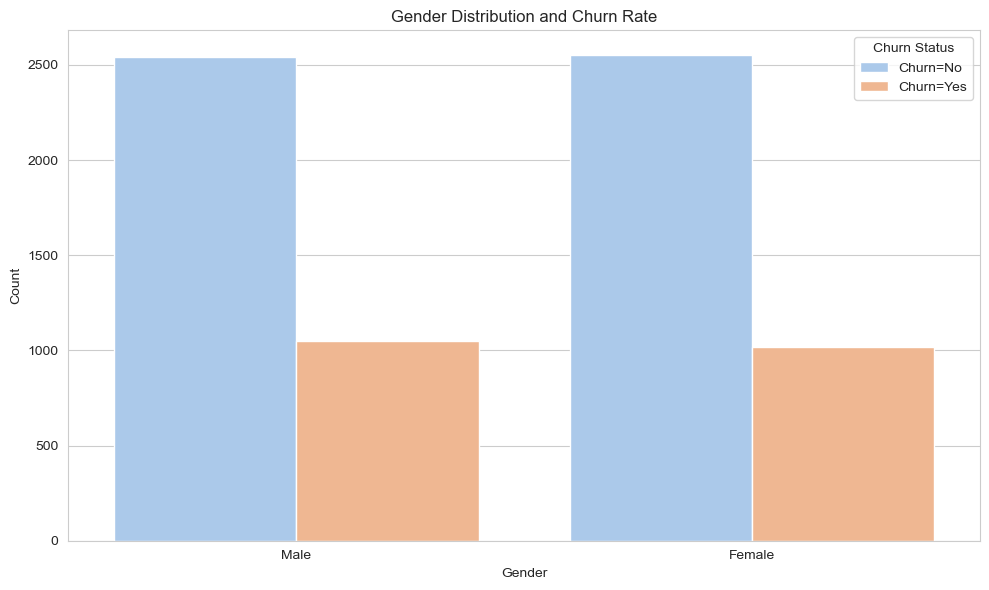

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette for the plots
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plotting Gender Distribution and Churn Rate
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Class', data=data)
plt.title("Gender Distribution and Churn Rate")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn Status")

plt.tight_layout()
plt.show()


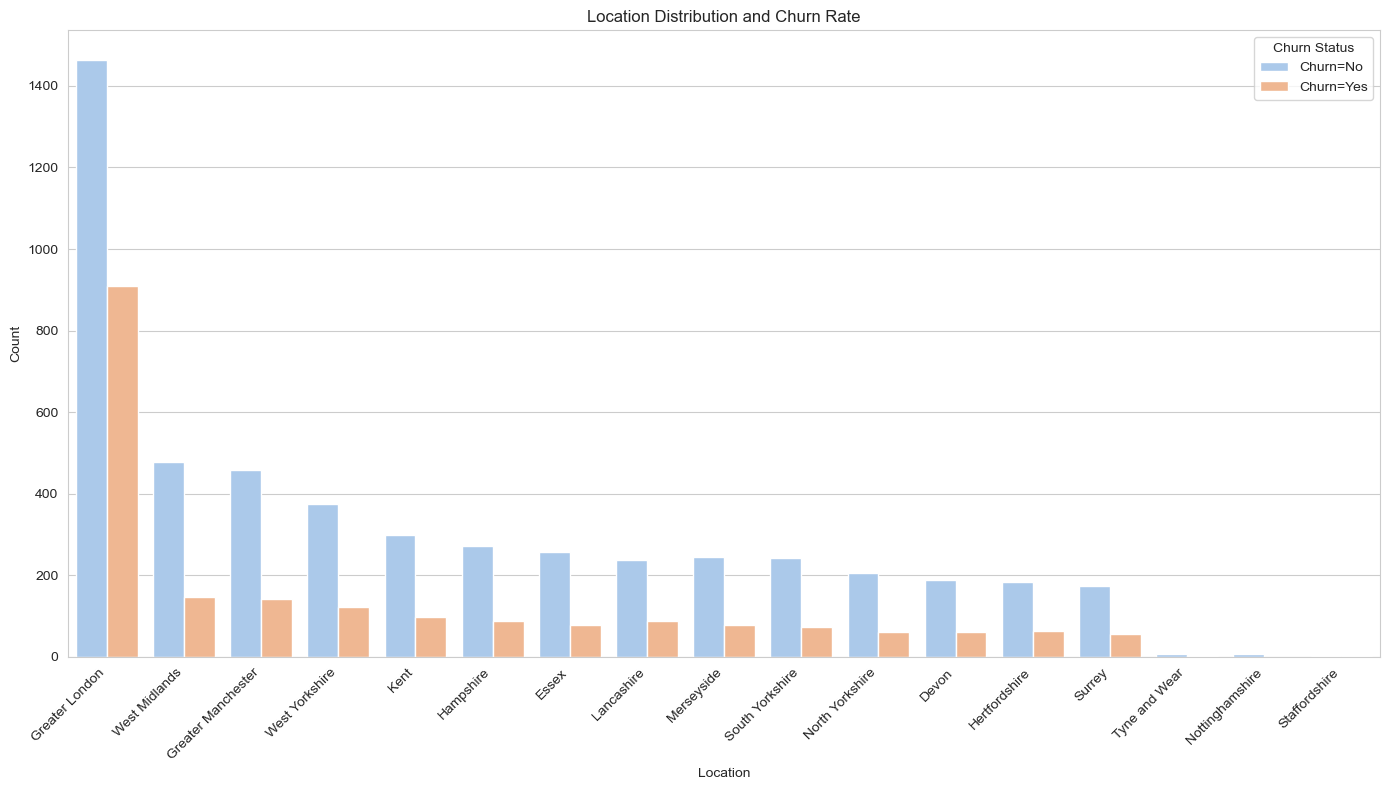

In [18]:
# Plotting Location Distribution and Churn Rate
plt.figure(figsize=(14, 8))
sns.countplot(x='location', hue='Class', data=data, order=data['location'].value_counts().index)
plt.title("Location Distribution and Churn Rate")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title="Churn Status")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


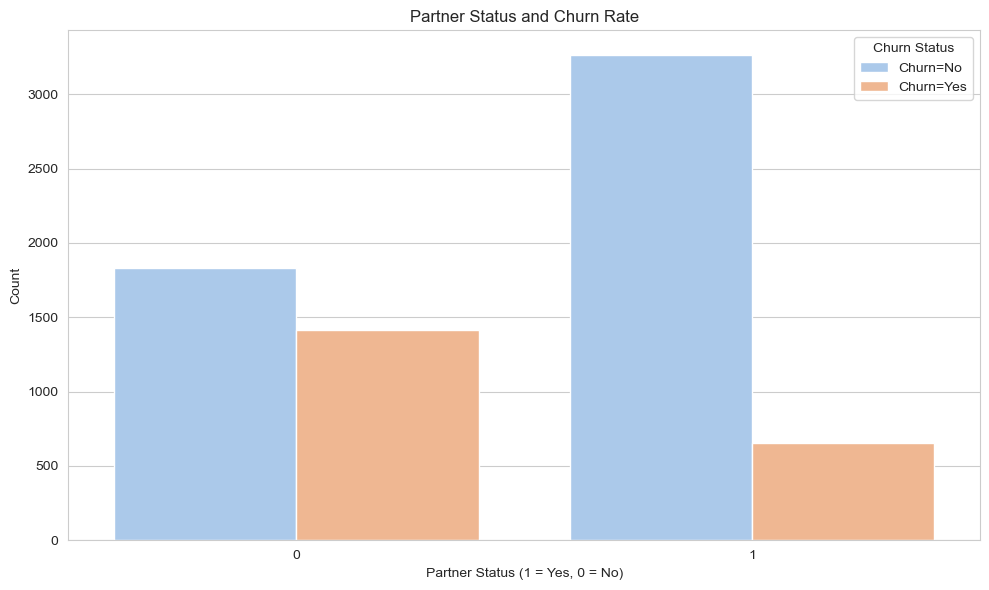

In [19]:
# Plotting Partner Status and Churn Rate
plt.figure(figsize=(10, 6))
sns.countplot(x='partner', hue='Class', data=data)
plt.title("Partner Status and Churn Rate")
plt.xlabel("Partner Status (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.legend(title="Churn Status")

plt.tight_layout()
plt.show()


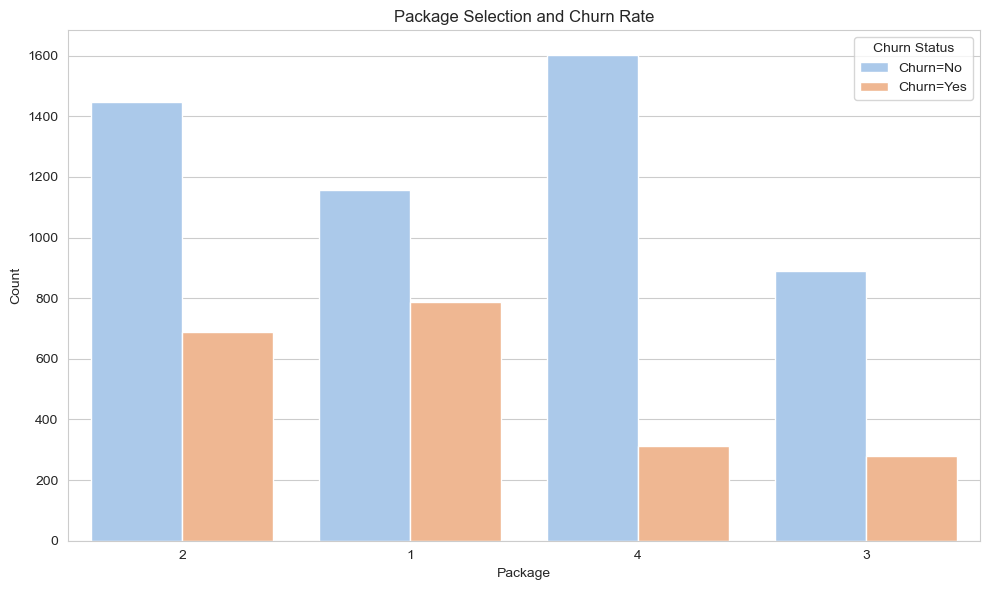

In [20]:
# Plotting Package Selection and Churn Rate
plt.figure(figsize=(10, 6))
sns.countplot(x='package', hue='Class', data=data, order=data['package'].value_counts().index)
plt.title("Package Selection and Churn Rate")
plt.xlabel("Package")
plt.ylabel("Count")
plt.legend(title="Churn Status")

plt.tight_layout()
plt.show()


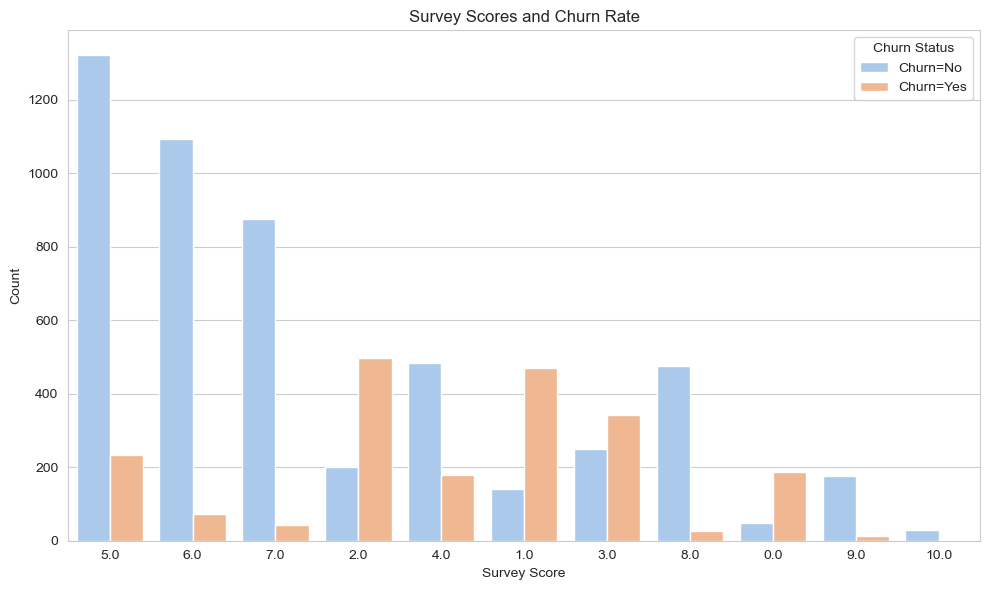

In [21]:
# Plotting Survey Scores and Churn Rate
plt.figure(figsize=(10, 6))
sns.countplot(x='survey', hue='Class', data=data, order=data['survey'].value_counts().index)
plt.title("Survey Scores and Churn Rate")
plt.xlabel("Survey Score")
plt.ylabel("Count")
plt.legend(title="Churn Status")

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


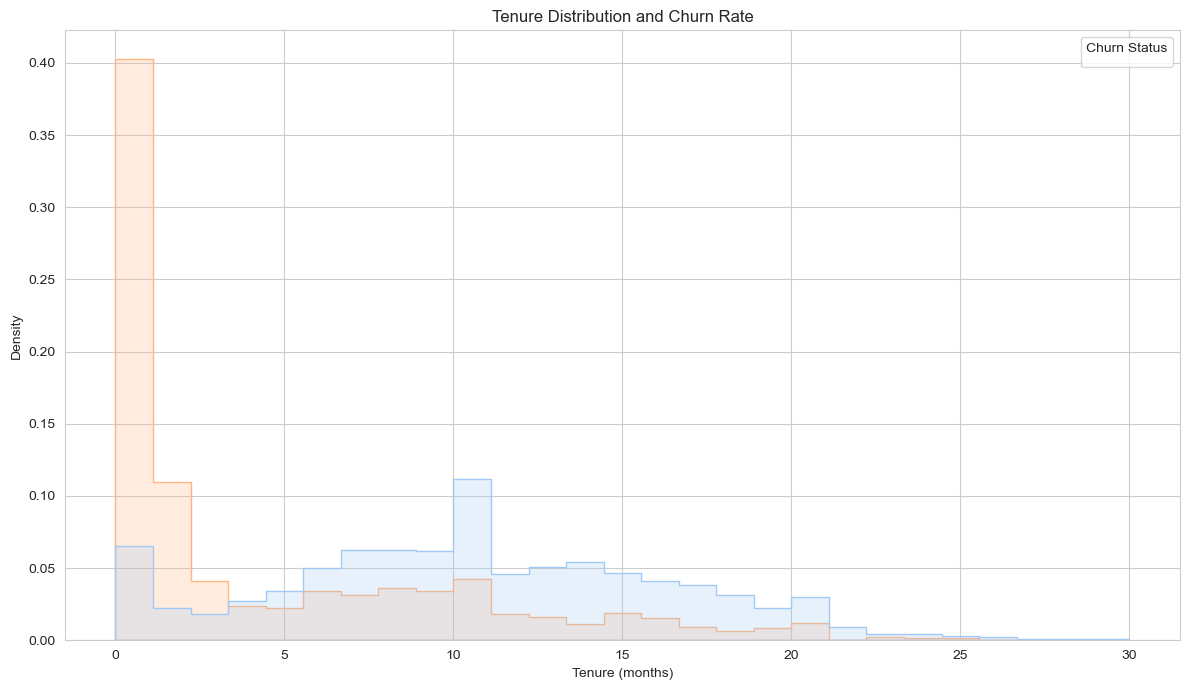

In [22]:
# Plotting Tenure Distribution and Churn Rate
plt.figure(figsize=(12, 7))
sns.histplot(data=data, x='Tenure', hue='Class', element='step', stat='density', common_norm=False)
plt.title("Tenure Distribution and Churn Rate")
plt.xlabel("Tenure (months)")
plt.ylabel("Density")
plt.legend(title="Churn Status")

plt.tight_layout()
plt.show()


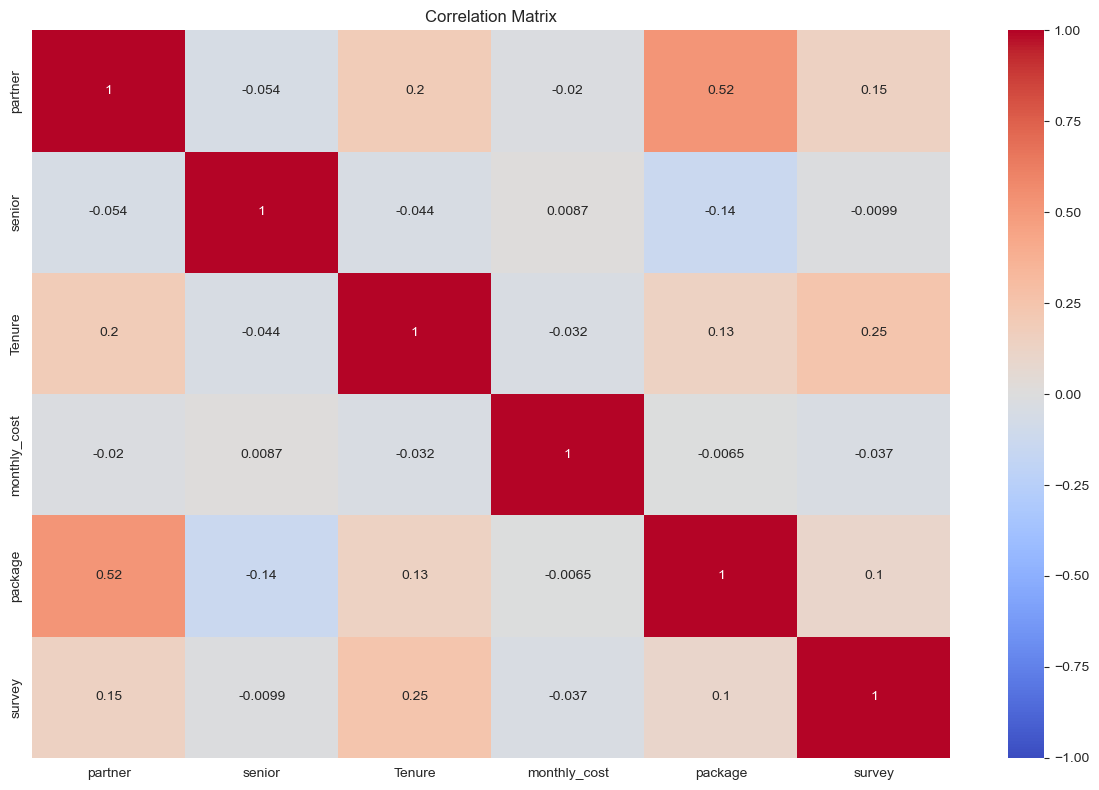

In [23]:
# Generating the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Take a copy to avoid the SettingWithCopyWarning
data = data.copy()

# Drop customer_id column
data.drop('customer_id', axis=1, inplace=True)

# Label encode gender and Class columns
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['Class'] = label_encoder.fit_transform(data['Class'])

# One-hot encode location column
data = pd.get_dummies(data, columns=['location'], drop_first=True)

# Split data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,gender,partner,dependents,senior,Tenure,monthly_cost,package,survey,location_Essex,location_Greater London,...,location_Lancashire,location_Merseyside,location_North Yorkshire,location_Nottinghamshire,location_South Yorkshire,location_Staffordshire,location_Surrey,location_Tyne and Wear,location_West Midlands,location_West Yorkshire
4605,0,1,1,0,11.0,31.20,3,9.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3997,0,1,1,0,17.0,26.40,3,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4764,0,1,0,0,22.0,25.20,4,3.0,0,0,...,1,0,0,0,0,0,0,0,0,0
6349,0,1,0,1,1.0,33.32,2,6.0,0,0,...,0,0,0,0,0,0,1,0,0,0
5775,0,1,1,0,3.0,24.44,1,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train

,gender,partner,dependents,senior,Tenure,monthly_cost,package,survey,location_Essex,location_Greater London,...,location_Lancashire,location_Merseyside,location_North Yorkshire,location_Nottinghamshire,location_South Yorkshire,location_Staffordshire,location_Surrey,location_Tyne and Wear,location_West Midlands,location_West Yorkshire
4605,0,1,1,0,11.0,31.20,3,9.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3997,0,1,1,0,17.0,26.40,3,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4764,0,1,0,0,22.0,25.20,4,3.0,0,0,...,1,0,0,0,0,0,0,0,0,0
6349,0,1,0,1,1.0,33.32,2,6.0,0,0,...,0,0,0,0,0,0,1,0,0,0
5775,0,1,1,0,3.0,24.44,1,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,0,1,1,1,1.0,33.32,2,6.0,0,1,...,0,0,0,0,0,0,0,0,0,0
5317,1,1,0,0,0.0,34.00,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5353,0,0,0,0,12.0,19.76,1,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
5520,0,0,0,0,1.0,25.48,1,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_test

,gender,partner,dependents,senior,Tenure,monthly_cost,package,survey,location_Essex,location_Greater London,...,location_Lancashire,location_Merseyside,location_North Yorkshire,location_Nottinghamshire,location_South Yorkshire,location_Staffordshire,location_Surrey,location_Tyne and Wear,location_West Midlands,location_West Yorkshire
7083,1,1,0,0,6.0,22.88,1,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
466,0,1,0,0,0.0,40.00,3,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
7076,1,1,1,0,8.0,37.80,4,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1693,1,0,0,0,0.0,26.00,1,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2963,1,0,1,0,2.0,24.96,1,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,1,1,0,0,3.0,42.30,4,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5077,1,1,0,1,7.0,22.36,1,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
285,1,1,1,1,0.0,34.00,2,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2140,0,1,1,0,12.0,34.20,4,6.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the models
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression model
logistic_reg.fit(X_train, y_train)

# Predict on the test set
logistic_reg_preds = logistic_reg.predict(X_test)

# Calculate accuracy for Logistic Regression
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_preds)

logistic_reg_accuracy


0.8800557880055788

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
decision_tree.fit(X_train, y_train)

# Predict on the test set
decision_tree_preds = decision_tree.predict(X_test)

# Calculate accuracy for Decision Tree Classifier
decision_tree_accuracy = accuracy_score(y_test, decision_tree_preds)

decision_tree_accuracy


0.8800557880055788

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier
random_forest.fit(X_train, y_train)

# Predict on the test set
random_forest_preds = random_forest.predict(X_test)

# Calculate accuracy for Random Forest Classifier
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)

random_forest_accuracy


0.9142259414225942

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting Classifier
gradient_boosting.fit(X_train, y_train)

# Predict on the test set
gradient_boosting_preds = gradient_boosting.predict(X_test)

# Calculate accuracy for Gradient Boosting Classifier
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_preds)

gradient_boosting_accuracy


0.9177126917712691

In [32]:
# Using the provided results to create the table
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
    'Accuracy (%)': [88.08, 88.01, 91.42, 91.77]
})

results_df


,Model,Accuracy (%)
0,Logistic Regression,88.08
1,Decision Tree Classifier,88.01
2,Random Forest Classifier,91.42
3,Gradient Boosting Classifier,91.77
